<a href="https://colab.research.google.com/github/gokturkberke/tensorflow-deeplearning/blob/main/neural_network_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# A classification is where you try to classify something as one thing or another

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples =1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1" :X[:,1],"label":y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


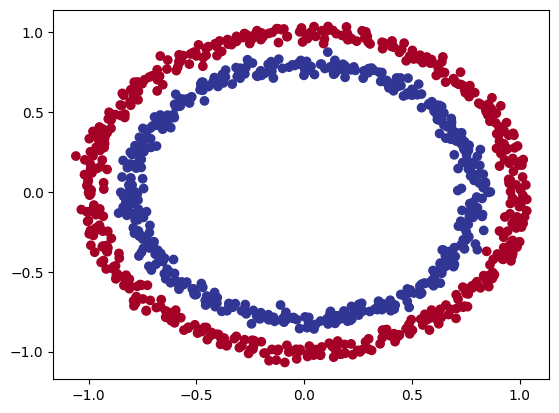

In [7]:
#lets visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);
#c=y: Her noktanın rengi y değişkenine göre belirleniyor

### Input and Output shapes

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

In [10]:
X[0],y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

### Steps in modelling

In [11]:
import tensorflow as tf

tf.random.set_seed(42)

#lets create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

#fit the model
model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4487 - loss: 3.0414   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5300 - loss: 0.7066 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5326 - loss: 0.6944
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5296 - loss: 0.6923
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5250 - loss: 0.6926


In [12]:
#improve the model
model_1.fit(X,y,epochs=200,verbose=0)

In [13]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around %50 accuracy...
So lets step things up. a notch and add and extra layer

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100,verbose=0)

In [15]:
model_2.evaluate(X,y) #we are evaluating the same data for now (train test we need to do)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 0.6922  


[0.6933764815330505, 0.4860000014305115]

In [16]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

In [17]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5201 - loss: 0.6917  


[0.6940975785255432, 0.49399998784065247]

In [18]:
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.51763827],
       [0.4814776 ],
       [0.4806087 ],
       [0.5025448 ],
       [0.48371366],
       [0.50020254],
       [0.5138039 ],
       [0.5160387 ],
       [0.4722831 ],
       [0.5165449 ],
       [0.46746972],
       [0.52803123],
       [0.51210743],
       [0.5037486 ],
       [0.49467242],
       [0.48116282],
       [0.4655563 ],
       [0.47856808],
       [0.4739891 ],
       [0.46269047],
       [0.51994395],
       [0.5025439 ],
       [0.47082046],
       [0.5184249 ],
       [0.48523697],
       [0.4784695 ],
       [0.5248188 ],
       [0.51011884],
       [0.4824183 ],
       [0.49888113],
       [0.46634725],
       [0.5135387 ],
       [0.51383597],
       [0.5181243 ],
       [0.46756983],
       [0.49344397],
       [0.49567455],
       [0.5221507 ],
       [0.48327312],
       [0.52717406],
       [0.46303123],
       [0.52552044],
       [0.46262592],
       [0.5082052 ],
       [0.46222952],
       [0.46598542],
       [0.488885  ],
       [0.518

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 #eksen sinirlari belirledik
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #100 esit parcaya bol
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in) #Model her grid noktası için tahmin yapar

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) #Her satır için en yüksek olasılığın index'ini bulur ondan sonra (10000,) olan diziyi (100, 100) şekline çevirir
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape) #her satirdaki max degeri alir zaten(1 tane var binaryde ama olsun) sonra 0.5ten buuykse 1 degilse 0

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


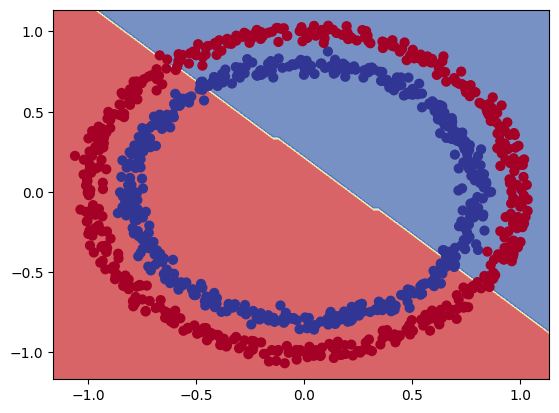

In [20]:
#check out the predciton
plot_decision_boundary(model=model_3,X=X,y=y)

In [21]:
x_min,x_max= X[:,0].min() - 0.1,X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1

x_min,x_max,y

(np.float64(-1.1595024599098636),
 np.float64(1.1337117525463374),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0

In [22]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#split data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 471.1107 - mae: 471.1107
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 371.1154 - mae: 371.1154 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 269.7722 - mae: 269.7722 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 165.7063 - mae: 165.7063 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.7810 - mae: 63.7810 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 66.2045 - mae: 66.2045 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.3111 - mae: 79.3111 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.0010 - mae: 57.0010 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.4562 - mae: 42.4562 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.0947 - mae: 47.0947 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.4084 - mae: 40.4084 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.3562 - mae: 42.3562 
Epoch 13/100
5/5 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


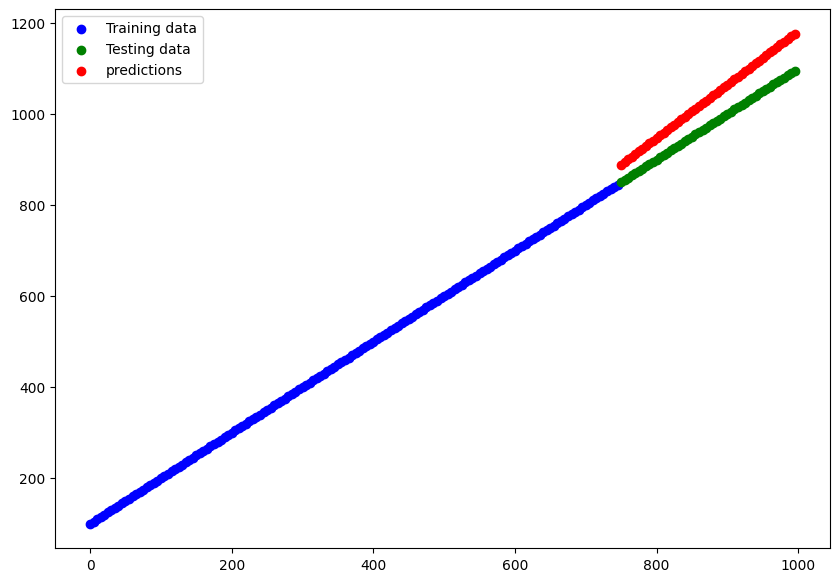

In [24]:
#Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#plot the model predictinos
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Testing data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="predictions")
plt.legend();

In [25]:
#NON-linearity

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4546 - loss: 6.7811   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 6.7341 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 6.7289 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4616 - loss: 6.7210 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6998 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6655 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6464 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6393 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6367 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6343 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6322 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

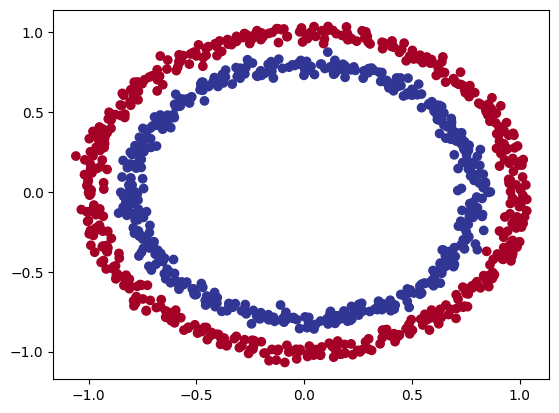

In [26]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
doing binary classifcation...


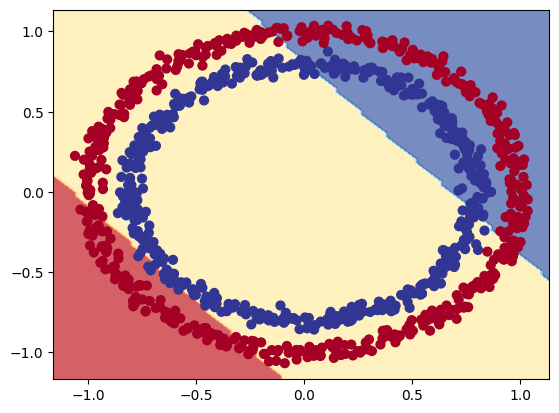

In [27]:
#Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

In [28]:
#Lets try build or first neural network with non linear function

tf.random.set_seed(42)

#non linear activation anything except linear
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4801 - loss: 5.0861   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4825 - loss: 4.9822 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4705 - loss: 4.9012 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4705 - loss: 4.8415 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 4.8085 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4755 - loss: 4.7844 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 4.7815
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 4.7787 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4762 - loss: 4.7760 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4740 - loss: 4.7734 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4740 - loss: 4.7709 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [29]:
#time to replicate multi layer neural network

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 4.9648
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 3.3304 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.8692 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.7884 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.6846 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.6337 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.5183 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.3865 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.3371
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.2325 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 2.1464 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [30]:
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5566 - loss: 0.6846  


[0.6965270638465881, 0.5120000243186951]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


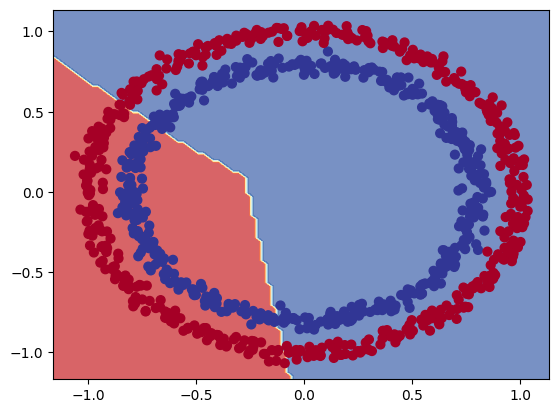

In [31]:
plot_decision_boundary(model_6,X,y)

In [32]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5216 - loss: 0.7012
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5146 - loss: 0.6994
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4994 - loss: 0.6983
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4929 - loss: 0.6975
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4545 - loss: 0.6969  
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4538 - loss: 0.6963 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4451 - loss: 0.6957 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4351 - loss: 0.6953 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4100 - loss: 0.6949
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3974 - loss: 0.6945 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3973 - loss: 0.6941
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

In [33]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.3533  


[0.3516720235347748, 0.9800000190734863]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


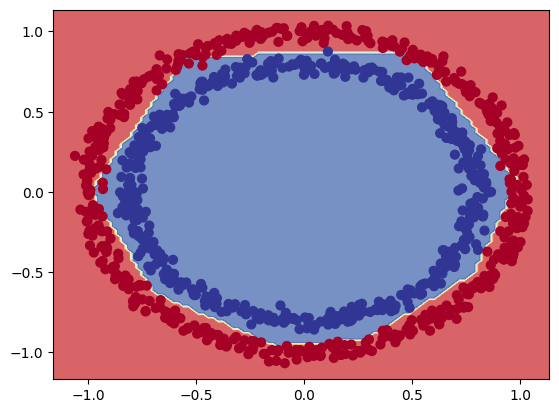

In [34]:
#lets visualize

plot_decision_boundary(model_7,X,y)

In [35]:
#Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

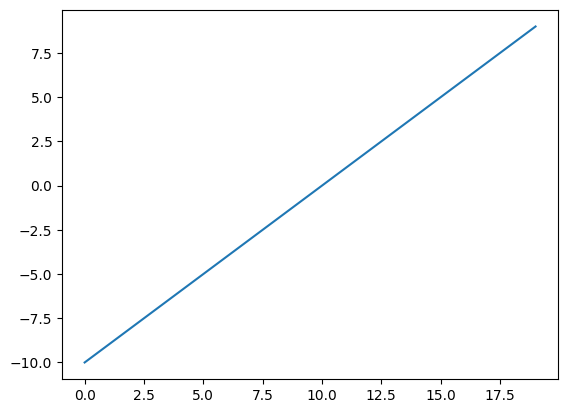

In [36]:
plt.plot(A)

In [37]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

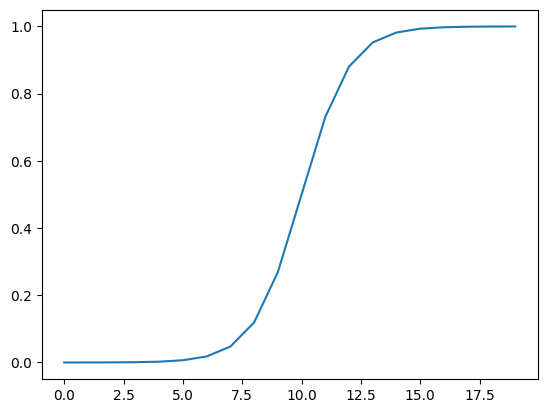

In [38]:
plt.plot(sigmoid(A))

In [39]:
def relu(x):
  return tf.maximum(0,x)

#Pass our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

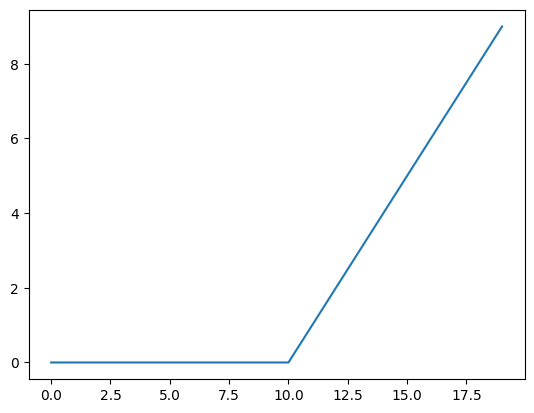

In [40]:
plt.plot(relu(A))

In [41]:
#Lets try the linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

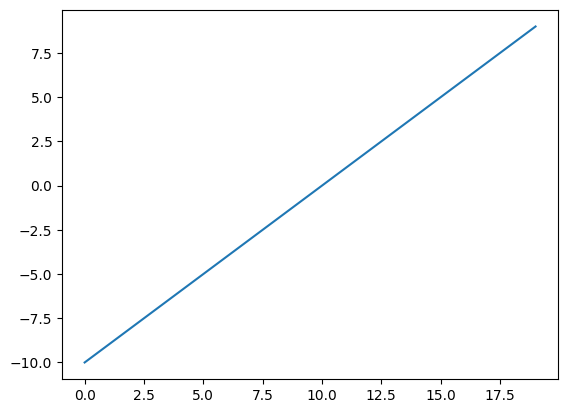

In [42]:
plt.plot(tf.keras.activations.linear(A))

In [43]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [44]:
len(X)

1000

In [45]:
#Split into train and test sets
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape,y_train.shape

((800, 2), (800,))

In [46]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
history = model_8.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5078 - loss: 0.6949
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5645 - loss: 0.6824 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.6695 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7349 - loss: 0.6500 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.6238 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.5891 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.5465 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.4942 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.4361 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9064 - loss: 0.3870 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9296 - loss: 0.3411 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [47]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9873 - loss: 0.0392 


[0.03714770823717117, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
doing binary classifcation...


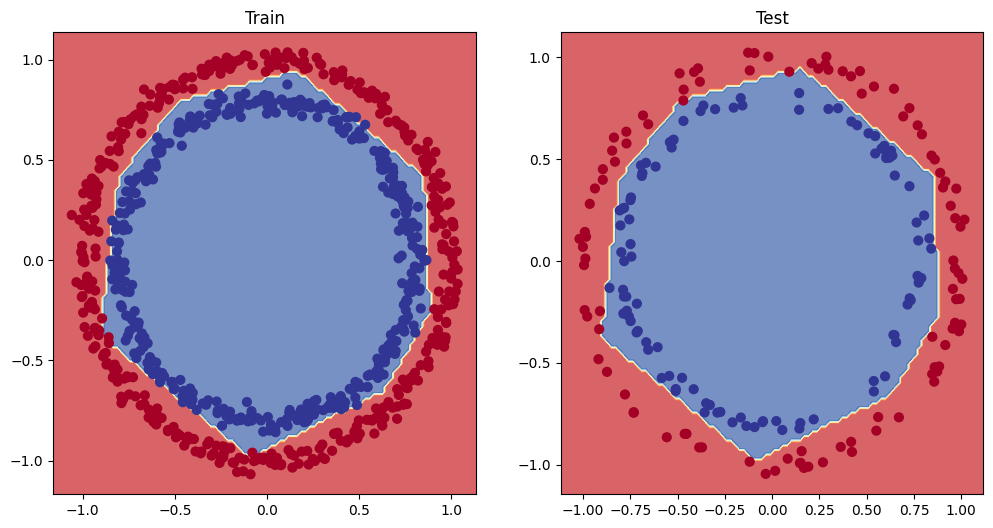

In [48]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

# Plot the loss curves

In [49]:
history.history

{'accuracy': [0.4937500059604645,
  0.5849999785423279,
  0.7049999833106995,
  0.7549999952316284,
  0.7662500143051147,
  0.7712500095367432,
  0.7950000166893005,
  0.8575000166893005,
  0.8824999928474426,
  0.9049999713897705,
  0.9312499761581421,
  0.9649999737739563,
  0.9712499976158142,
  0.981249988079071,
  0.9837499856948853,
  0.9862499833106995,
  0.9850000143051147,
  0.9850000143051147,
  0.9850000143051147,
  0.9850000143051147,
  0.9850000143051147,
  0.9862499833106995,
  0.987500011920929,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9900000095367432,
  0.9900000095367432,
  0.9900000095367432,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9887499809265137,
  0.9900000095367432,
  0.9900000095367432,
  0.9900000095367432,


In [50]:
#Conver the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.49375,0.692755
1,0.58500,0.680015
2,0.70500,0.665828
3,0.75500,0.645171
4,0.76625,0.616750
5,0.77125,0.580209
6,0.79500,0.536644
7,0.85750,0.479884
8,0.88250,0.426345
9,0.90500,0.377947


Text(0.5, 1.0, 'Model_8 Loss curves')

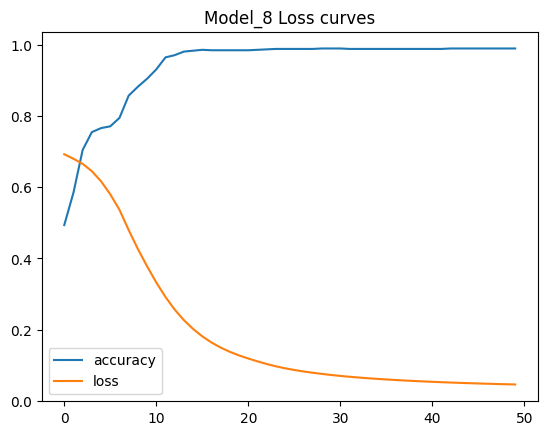

In [51]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss curves")

## Finding the best learning rate
The following steps to find
* A learning rate **callback**
* Another model
* A modified loss curves plot

In [52]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5034 - loss: 0.6996 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5019 - loss: 0.6995 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5013 - loss: 0.6993 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5043 - loss: 0.6991 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4942 - loss: 0.6989 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4915 - loss: 0.6987 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4981 - loss: 0.6985 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 0.6983 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 0.6981 - learning_

<Axes: xlabel='Epochs'>

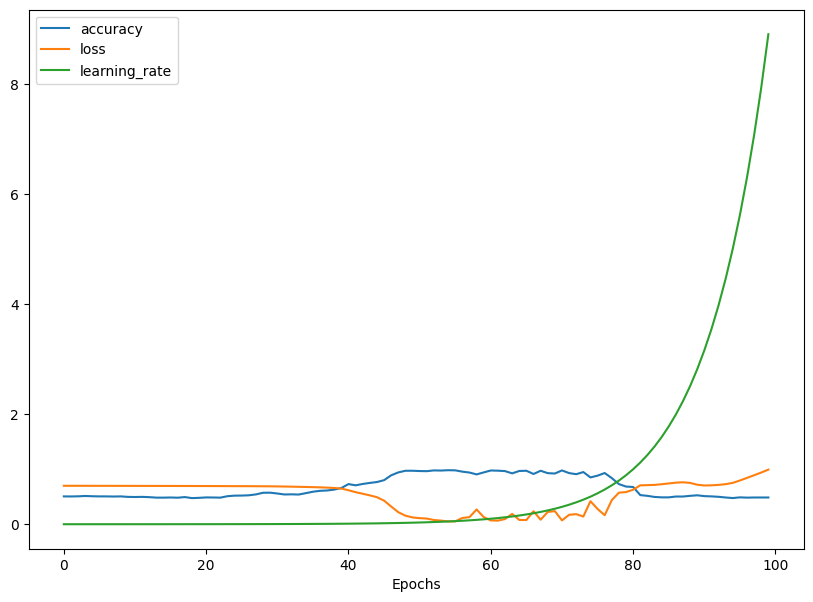

In [53]:
#Checkout the history
pd.DataFrame(history_9.history).plot(figsize = (10,7),xlabel="Epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

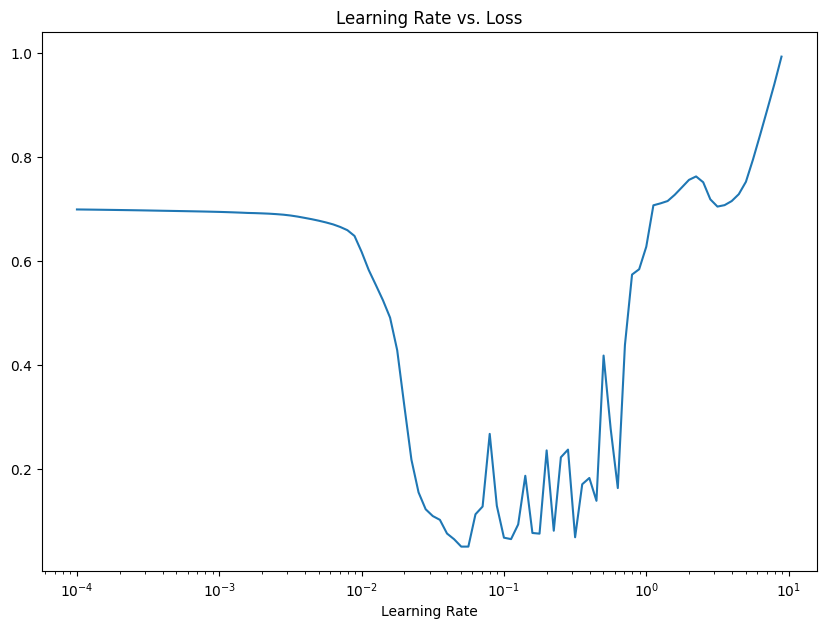

In [54]:
#Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.title("Learning Rate vs. Loss")

In [55]:
#Example of other typical learning rate values
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train,y_train,epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4696 - loss: 0.7072
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5601 - loss: 0.6784 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5900 - loss: 0.6611 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.6348 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 0.5937 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.5293 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9262 - loss: 0.3863 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.2340 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.1416 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.1012 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0820 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [57]:
#Evaluate model 10
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9842 - loss: 0.0285  


[0.02140050008893013, 0.9900000095367432]

In [58]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0392 


[0.03714770823717117, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


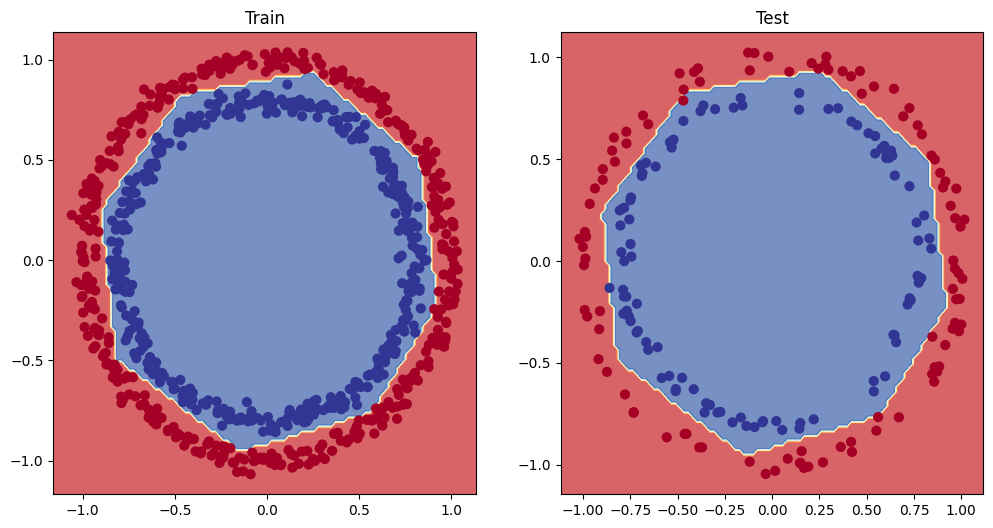

In [59]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show();

# Classification Evaluation Metrics

| **Metric name / Evaluation method** | **Definition** | **Code** |
|-------------------------------------|----------------|----------|
| **Accuracy** | Out of 100 predictions, how many does your model get correct? <br> E.g. 95% accuracy means it gets 95/100 predictions correct. | `sklearn.metrics.accuracy_score()` <br> `tf.keras.metrics.Accuracy()` |
| **Precision** | Proportion of true positives over total number of predicted positives. <br> Higher precision → fewer false positives (model predicts 1 when it should've been 0). | `sklearn.metrics.precision_score()` <br> `tf.keras.metrics.Precision()` |
| **Recall** | Proportion of true positives over total number of actual positives (true positives + false negatives). <br> Higher recall → fewer false negatives (model predicts 0 when it should've been 1). | `sklearn.metrics.recall_score()` <br> `tf.keras.metrics.Recall()` |
| **F1-score** | Harmonic mean of precision and recall. <br> Best = 1, Worst = 0. | `sklearn.metrics.f1_score()` |
| **Confusion matrix** | Compares predicted vs. true values in a tabular form. <br> If 100% correct → all values fall on diagonal (top-left → bottom-right). | `sklearn.metrics.confusion_matrix()` <br> `sklearn.metrics.ConfusionMatrixDisplay()` |
| **Classification report** | Collection of main classification metrics (precision, recall, f1-score, support). | `sklearn.metrics.classification_report()` |


# Classification Metrics – Ne Zaman Hangisi?

- **Accuracy (Doğruluk)**  
  Dengeli veri setlerinde kullanılır.  
  Örn: Kedi vs köpek sınıflandırma.  

- **Precision (Kesinlik)**  
  Yanlış pozitifler kritikse önemlidir.  
  Örn: Spam filtresi, sahte haber tespiti.  

- **Recall (Duyarlılık)**  
  Yanlış negatifler kritikse önemlidir.  
  Örn: Kanser tespiti, güvenlik taramaları.  

- **F1-score**  
  Precision + Recall dengesini sağlar. Özellikle dengesiz veri setlerinde tercih edilir.  
  Örn: Fraud (kredi kartı dolandırıcılığı) tespiti.  


## More classification evaluation methods

In [60]:
#Check the accuracy of our model
loss,accuracy = model_10.evaluate(X_test,y_test)
print(f"model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9842 - loss: 0.0285 
model loss on the test set : 0.02140050008893013
Model accuracy on the test set : 99.00


In [61]:
#How about a confusion matrix
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)

confusion_matrix(y_test,y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [62]:
y_test[:10],y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[9.9985945e-01],
        [9.9993205e-01],
        [9.9971884e-01],
        [9.9965340e-01],
        [2.3447575e-02],
        [1.2865404e-05],
        [9.7528899e-01],
        [1.5587628e-05],
        [9.9991494e-01],
        [1.2599815e-03]], dtype=float32))

In [63]:
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [64]:
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

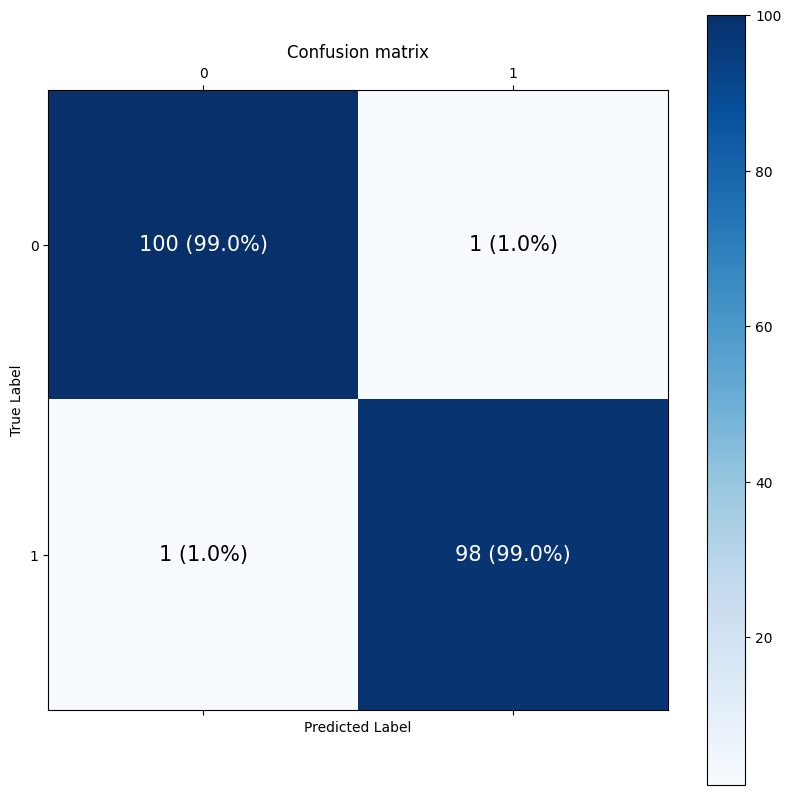

In [66]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize confusion matrix (her satiri kendi toplamina bolerek oran cikarir)
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)  # heatmap cizer ve renk yogunlugu = tahmin sayisi
fig.colorbar(cax)

# Create class labels
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(
    title="Confusion matrix",
    xlabel="Predicted Label",
    ylabel="True Label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set Threshold (to decide white/black text color)
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            ha="center", va="center",
            color="white" if cm[i, j] > threshold else "black",
            fontsize=15)


In [67]:
cm_norm,cm.shape[0]

(array([[0.99009901, 0.00990099],
        [0.01010101, 0.98989899]]),
 2)